# Deep Learning - Dr. Tristan Behrens
## Heute: Einführung in neuronale Netze mit Hilfe objektorientierter Programmierung
---
<a href="https://colab.research.google.com/github/AI-Guru/fhws/blob/master/01%20Pflichtvortrag%20Deutsch/oop%20deep%20learning.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="margin-left:0"/>
</a>

## 1. Kurzfassung.

- Wie konstruiert man objektorientiert tiefe Neuronale Netze?
- Was sind die Bausteine?
- Wie ermittelt man, wie "gut" ein Neuronales Netz ist?

## 2. Tiefe Neuronale Netze.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
if tf.__version__.startswith("1."):
    tf.compat.v1.enable_eager_execution()

### 2.1. Schichttyp: Fully connected bzw. Dense.

- Einfachste Schicht.
- Formel: `fc(x) = W * x + b`.
- Freiheitsgrade: Weights und Biases.

In [2]:
class FullyConnectedLayer(tf.keras.layers.Layer):
    
    def __init__(self, hidden_units):
        super(FullyConnectedLayer, self).__init__()
        self.hidden_units = hidden_units

    def build(self, input_shape):
        self.weights_trainable = self.add_weight(
            "weights",
            shape=(int(input_shape[-1]), self.hidden_units),
            initializer="random_normal",
            trainable=True)
        self.biases_trainable = self.add_weight(
            "biases",
            shape=(self.hidden_units,),
            initializer="zeros",
            trainable=True)

    def call(self, x):
        return tf.matmul(x, self.weights_trainable) + self.biases_trainable

---
**Frage:** Wie lässt sich das visuell darstellen?

---
Schichten können einfach instanziiert werden.

In [3]:
fully_connected_layer = FullyConnectedLayer(2)
fully_connected_layer.build(input_shape=(3,))
print("weights:", fully_connected_layer.weights_trainable.numpy())
print("biases:", fully_connected_layer.biases_trainable.numpy())

weights: [[ 0.04561059  0.02083484]
 [-0.06646654  0.02382166]
 [ 0.0313466  -0.0039676 ]]
biases: [0. 0.]


---
Schichten sind mathematische Funktionen, die auf Eingaben angewandt werden können.

In [4]:
x = tf.ones((1, 3))
y = fully_connected_layer(x)
print("x:", x.numpy())
print("y:", y.numpy())

x: [[1. 1. 1.]]
y: [[ 0.02716337 -0.02203565]]


### 2.2. Mehrere Schichten.

In [5]:
fully_connected_layer_1 = FullyConnectedLayer(2)
fully_connected_layer_2 = FullyConnectedLayer(1)

x = tf.ones((1, 3))
y = fully_connected_layer_2(fully_connected_layer_1(x))

print("x:", x.numpy())
print("y:", y.numpy())

x: [[1. 1. 1.]]
y: [[0.00628624]]


---
**Frage:** Ist dieses ANN wirklich tief?

### 2.3. Aktivierungsfunktion ReLU.

- Sehr einfach zu berechnen, `relu(x) = max(0, x)`.
- Nichtlinear.
- Sehr gut für alle Schichten geeignet, die nicht die Ausgabeschicht sind.

In [6]:
class ReluLayer(tf.keras.layers.Layer):
    
    def __init__(self):
        super(ReluLayer, self).__init__(dtype="float32")

    def build(self, input_shape):
        pass
        
    def call(self, x):
        return tf.nn.relu(x)

---
Auch Aktivierungsfunktionen können einfach instanziiert werden.

In [7]:
relu_layer = ReluLayer()

---
So sieht ReLU aus.

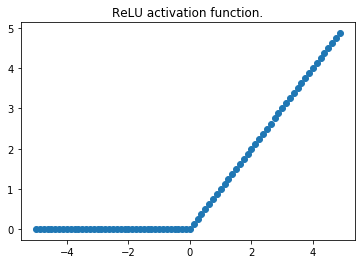

In [8]:
points_x = []
points_y = []
for x in np.arange(-5.0, 5.0, 0.125):
    y = relu_layer([x]).numpy()[0]
    points_x.append(x)
    points_y.append(y)

plt.scatter(points_x, points_y)
plt.title("ReLU activation function.")
plt.show()
plt.close()

### 2.4. Aktivierungsfunktion Sigmoid.

- Ein wenig aufwendiger als sigmoid.
- Formel ist `sigmoid(x) = exp(x) / (exp(x) + 1)`.
- Wird eher bei Ausgabeschichten benutzt.

In [9]:
class SigmoidLayer(tf.keras.layers.Layer):
    
    def __init__(self):
        super(SigmoidLayer, self).__init__(dtype="float32")

    def build(self, input_shape):
        pass
        
    def call(self, x):
        return tf.nn.sigmoid(x)

---
Die Instanziierung ist einfach.

In [10]:
sigmoid_layer = SigmoidLayer()

---
Und so sieht sigmoid aus.

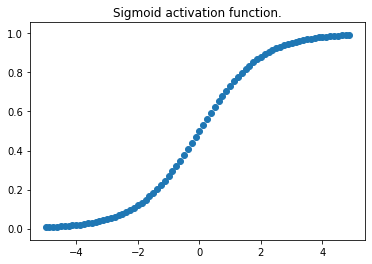

In [11]:
points_x = []
points_y = []
for x in np.arange(-5.0, 5.0, 0.125):
    y = sigmoid_layer([x]).numpy()[0]
    points_x.append(x)
    points_y.append(y)

plt.scatter(points_x, points_y)  
plt.title("Sigmoid activation function.")
plt.show()
plt.close()

### 2.5. Aktivierungsfunktion Softmax.

- Normalisierte Exponentialfunktion.
- Formel: `softmax(x) = exp(x) / sum(exp(x))`.
- Alle Ergebnisse sind zwischen 0 und 1.
- Summe der Ergebnisse ist 1.
- Wahrscheinlichkeitsverteilung.

In [12]:
class SoftmaxLayer(tf.keras.layers.Layer):
    
    def __init__(self):
        super(SoftmaxLayer, self).__init__(dtype="float32")

    def build(self, input_shape):
        pass
        
    def call(self, x):
        return tf.nn.softmax(x)

---
Instanziierung.

In [13]:
softmax_layer = SoftmaxLayer()

---
Visualisierung von Softmax.

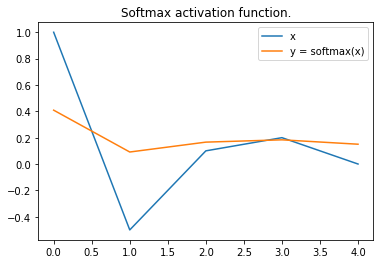

In [14]:
x = [1.0, -0.5, 0.1, 0.2, 0.0]
y = softmax_layer(x).numpy()

plt.plot(x, label="x")
plt.plot(y, label="y = softmax(x)")
plt.legend()
plt.title("Softmax activation function.")
plt.show()
plt.close()

## 3. Handschriftenerkennung mit einem tiefen Neuronalen Netz.

### 3.1 Das MNIST-Dataset.

- Datenbank handgeschriebener Ziffern.
- Das "Hallo Welt" vom Machine Learning.
- Anwendung im Finanz- und Postwesen.


In [15]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images", train_images.shape)
print("train_labels", train_labels.shape)
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

train_images (60000, 28, 28)
train_labels (60000,)
test_images (10000, 28, 28)
test_labels (10000,)


___
**Frage:** Warum Training- und Testmenge?

___
Dataset-Visualisierung (Original):

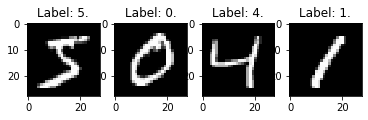

In [16]:
index = 1
for image, label in zip(train_images[:4], train_labels[:4]):
    plt.subplot(1, 4, index)
    plt.imshow(image, cmap=plt.get_cmap("gray"))
    plt.title("Label: {}.".format(label))
    index += 1 
plt.show()
plt.close()

### 3.2. Multi-Layer Perceptron.

- Mehrere Schichten.
- Nichtlineare Aktivierungsfunktionen.

In [17]:
class MultiLayerPerceptron(tf.keras.Model):

    def __init__(self):
        super(MultiLayerPerceptron, self).__init__()
        
        self.fc_1 = FullyConnectedLayer(512)
        self.relu = ReluLayer()
        self.fc_2 = FullyConnectedLayer(10)
        self.softmax = SoftmaxLayer()

    def build_graph(self, input_shape): 
        input_shape_nobatch = input_shape[1:]
        self.build(input_shape)
        inputs = tf.keras.Input(shape=input_shape_nobatch)
        
        if not hasattr(self, 'call'):
            raise AttributeError("User should define 'call' method in sub-class model!")
        
        _ = self.call(inputs)
    
    def call(self, x):
        y = self.fc_1(x)
        y = self.relu(y)
        y = self.fc_2(y)
        y = self.softmax(y)
        return y

---
Wir instanziieren das tiefe Neuronale Netz mit 784 Eingangsneuronen.

In [18]:
model = MultiLayerPerceptron()
model.build_graph(input_shape=(None, 784,))
model.summary()

Model: "multi_layer_perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fully_connected_layer_3 (Ful (None, 512)               401920    
_________________________________________________________________
relu_layer_1 (ReluLayer)     (None, 512)               0         
_________________________________________________________________
fully_connected_layer_4 (Ful (None, 10)                5130      
_________________________________________________________________
softmax_layer_1 (SoftmaxLaye (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3.3. Daten kodieren.

In [19]:
x_train = train_images.astype("float32").reshape((-1, 784)) / 255.0
x_test = test_images.astype("float32").reshape((-1, 784)) / 255.0

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 784)
y_train: (60000, 10)
x_test: (10000, 784)
y_test: (10000, 10)


---
Dataset-Visualisierung (kodiert):

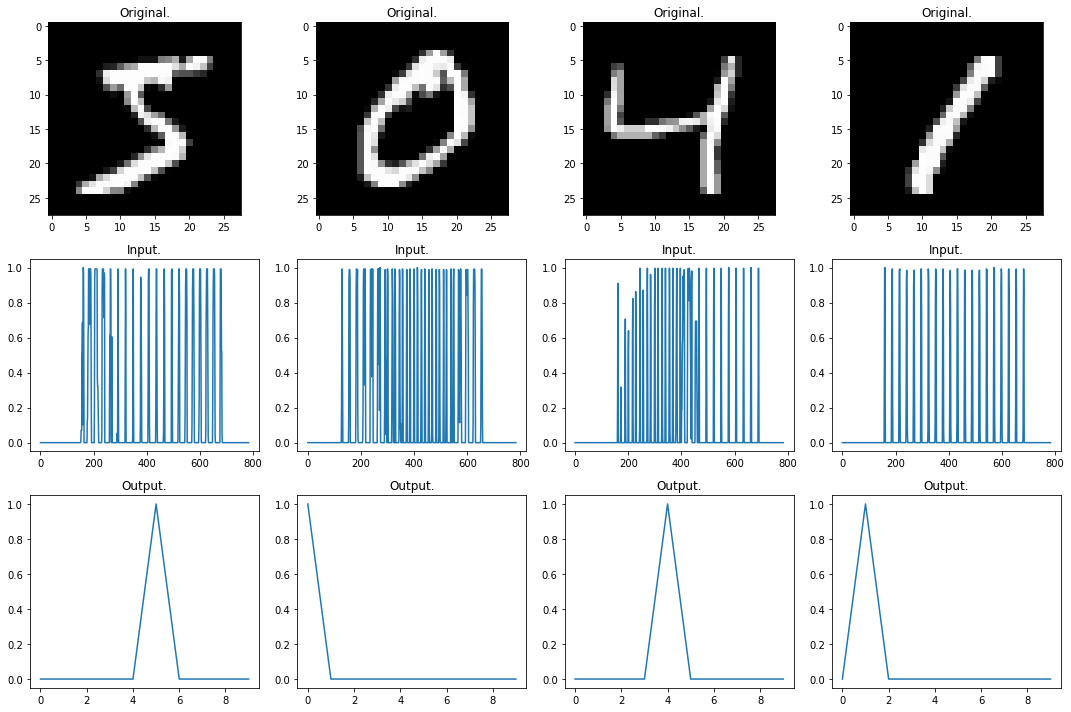

In [20]:
index = 1
plt.figure(figsize=(15, 10))
for image, label in zip(x_train[:4], y_train[:4]):
    plt.subplot(3, 4, index)
    plt.title("Original.")
    plt.imshow(image.reshape((28, 28)), cmap="gray")
    plt.subplot(3, 4, index + 4)
    plt.title("Input.")
    plt.plot(image)
    plt.subplot(3, 4, index + 8)
    plt.title("Output.")
    plt.plot(label)
    index += 1
plt.tight_layout()

### 3.4. Das Modell kompilieren.

In [21]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

### 3.5. Wie gut ist das Neuronale Netz vor dem Training?

1/1 [==============================] - 0s 195ms/sample - loss: 2.0748 - accuracy: 0.0000e+00


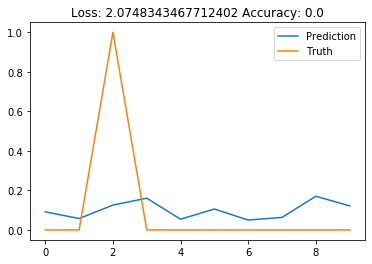

In [22]:
index = random.randint(0, len(x_test) - 1)
image, label = x_test[index], y_test[index]
prediction = model.predict(np.array([image]))[0]
loss, accuracy = model.evaluate(np.array([image]), np.array([label]))

plt.plot(prediction, label="Prediction")
plt.plot(label, label="Truth")
plt.legend()
plt.title("Loss: {} Accuracy: {}".format(loss, accuracy))
plt.show()
plt.close()

---
Loss und Accuracy auf dem ganzen Dataset (vor dem Training).

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: {} Accuracy: {}".format(loss, accuracy))

10000/10000 [==============================] - 1s 58us/sample - loss: 2.3965 - accuracy: 0.0881
Loss: 2.3965315048217772 Accuracy: 0.08810000121593475


---
Betrachtung einiger Samples.

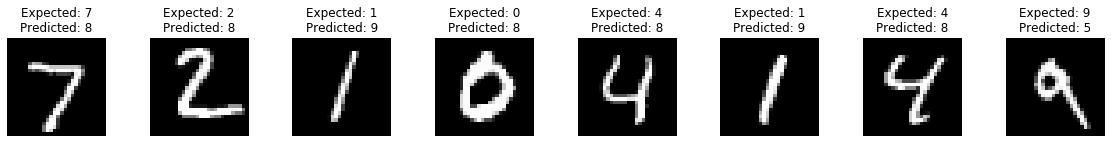

In [24]:
images = x_test[0:8]
expected_labels = y_test[0:8]
predicted_labels = model.predict(images)

index = 1
plt.figure(figsize=(16, 2))
for image, expected_label, predicted_label in zip(images, expected_labels, predicted_labels):
    plt.subplot(1, 8, index)
    plt.axis('off')
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.title("Expected: {}\nPredicted: {}".format(np.argmax(expected_label), np.argmax(predicted_label)))
    index += 1
plt.tight_layout()

### 3.6. Model-Training.

In [25]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_train, y_train)
)

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2672 - accuracy: 0.9234 - val_loss: 0.1394 - val_accuracy: 0.9614
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1078 - accuracy: 0.9684 - val_loss: 0.0793 - val_accuracy: 0.9756
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.0545 - val_accuracy: 0.9834
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0351 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0286 - val_accuracy: 0.9920
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0301 - accuracy: 0.9914 - val_loss: 0.0206 - val_accuracy: 0.9943
Epoch 7/10
60000/60000 [==============================] 

---
**Frage:** Wie funktioniert das Training?

---
Auswertung der Trainings-Historie.

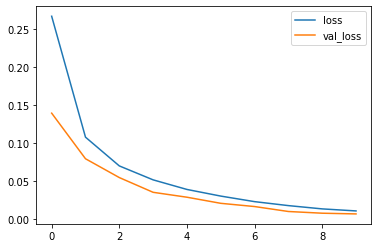

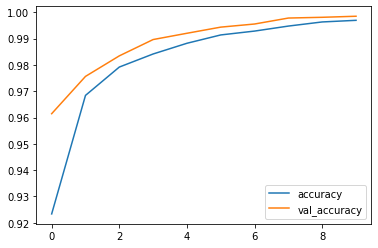

In [26]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

if "accuracy" in history.history:
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()
elif "acc" in history.history:
    plt.plot(history.history["acc"], label="acc")
    plt.plot(history.history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()

### 3.7. Wie gut ist das Neuronale Netz nach dem Training?

1/1 [==============================] - 0s 4ms/sample - loss: 4.8517e-05 - accuracy: 1.0000


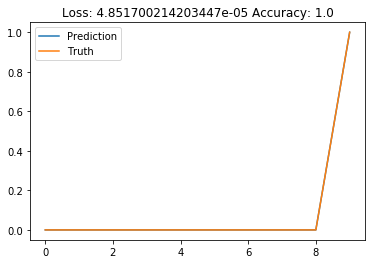

In [27]:
index = random.randint(0, len(x_test) - 1)
image, label = x_test[index], y_test[index]
prediction = model.predict(np.array([image]))[0]
loss, accuracy = model.evaluate(np.array([image]), np.array([label]))

plt.plot(prediction, label="Prediction")
plt.plot(label, label="Truth")
plt.legend()
plt.title("Loss: {} Accuracy: {}".format(loss, accuracy))
plt.show()
plt.close()

--- 
Loss und Accuracy auf dem ganzen Dataset (nach dem Training).

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: {} Accuracy: {}".format(loss, accuracy))

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0708 - accuracy: 0.9818
Loss: 0.0708124976951185 Accuracy: 0.9818000197410583


---
Betrachtung einiger Samples.

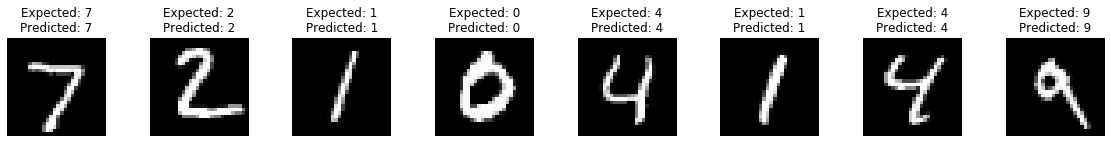

In [29]:
images = x_test[0:8]
expected_labels = y_test[0:8]
predicted_labels = model.predict(images)

index = 1
plt.figure(figsize=(16, 2))
for image, expected_label, predicted_label in zip(images, expected_labels, predicted_labels):
    plt.subplot(1, 8, index)
    plt.axis('off')
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.title("Expected: {}\nPredicted: {}".format(np.argmax(expected_label), np.argmax(predicted_label)))
    index += 1
plt.tight_layout()

## 4. Zusammenfassung, Hausaufgaben, Vorschau.

### Zusammenfassung.
- Tiefe Neuronale Netze sind gestapelte (nicht-lineare) Funktionen.
- Training ist das algorithmische Ermitteln optimaler Freiheitsgrade.
- Die Datengrundlage ist entscheidend.

### Hausaufgaben.
- [ ] Experimentieren mit der Implementierung.
- [ ] Auf CIFAR10 und CIFAR100 trainieren.

### Vorschau.
- Weitere Schichten: Convolutions, Poolings, Recurrent Layers et cetera.
- Im Detail: Stochastic Gradient Descent.
- Wichtige Begriffe: Underfitting und Overfitting?
- Use Cases: Unter anderem Image Processing, Natural Language Processing und Time Series Analysis.

## Quellen.

- https://www.tensorflow.org
- https://www.manning.com/books/deep-learning-with-python
- https://www.deeplearningbook.org